In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
plt.rcParams['axes.unicode_minus']=False       #显示负号
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle 
# 保存
with open('densenet_pred_results.pkl', 'rb') as f:
    pred_results = pickle.load(f)
PREL = pred_results[0]['yhat'].shape[1]

In [3]:
hangye = ['x','y']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 定义计算ADE和FDE的函数
def get_ade(forecasted_trajectory, gt_trajectory):
    """计算平均位移误差（ADE）"""
    pred_len = forecasted_trajectory.shape[0]
    ade = float(
        sum(
            math.sqrt(
                (forecasted_trajectory[i, 0] - gt_trajectory[i, 0]) ** 2
                + (forecasted_trajectory[i, 1] - gt_trajectory[i, 1]) ** 2
            )
            for i in range(pred_len)
        )
        / pred_len
    )
    return ade

def get_fde(forecasted_trajectory, gt_trajectory):
    """计算最终位移误差（FDE）"""
    fde = math.sqrt(
        (forecasted_trajectory[-1, 0] - gt_trajectory[-1, 0]) ** 2
        + (forecasted_trajectory[-1, 1] - gt_trajectory[-1, 1]) ** 2
    )
    return fde

def get_rmse(forecasted_trajectory, gt_trajectory):
    """计算均方根误差（RMSE）"""
    pred_len = forecasted_trajectory.shape[0]
    rmse = float(
        math.sqrt(
            sum(
                ((forecasted_trajectory[i, 0] - gt_trajectory[i, 0]) ** 2
                + (forecasted_trajectory[i, 1] - gt_trajectory[i, 1]) ** 2)
                for i in range(pred_len)
            ) / pred_len
        )
    )
    return rmse

def cob(inverse_preds, inverse_true, save_dir):
    plots_dir = save_dir + f'/multi_steps/LSTM/混合/'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    # 计算ADE、FDE和RMSE
    ade = get_ade(inverse_preds[0], inverse_true[0])
    fde = get_fde(inverse_preds[0], inverse_true[0])
    rmse = get_rmse(inverse_preds[0], inverse_true[0])

    # 绘制轨迹
    plt.figure(figsize=(8, 4))
    plt.scatter(inverse_preds[0, :, 0], inverse_preds[0, :, 1], c='blue', label='Predicted Trajectory')
    plt.scatter(inverse_true[0, :, 0], inverse_true[0, :, 1], c='red', label='Ground Truth Trajectory')
    plt.plot(inverse_preds[0, :, 0], inverse_preds[0, :, 1], c='blue', linestyle='--')
    plt.plot(inverse_true[0, :, 0], inverse_true[0, :, 1], c='red', linestyle='-')

    # 添加ADE、FDE和RMSE文本
    plt.text(0.05, 0.9, f'ADE: {ade:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
    plt.text(0.05, 0.85, f'FDE: {fde:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
    plt.text(0.05, 0.8, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')

    # 添加图例和标题
    plt.legend()
    plt.title('Trajectory prediction comparison')
    plt.xlabel('X Direction')
    plt.ylabel('Y Direction')
    plt.grid(True)
    plt.savefig(plots_dir + '轨迹预测.png')
    plt.close()
    return ade, fde, rmse

ade_list, fde_list, rmse_list = [], [], []
for j, k in enumerate(pred_results.keys()):
    data = pred_results[k]
    y_pred = data['yhat']
    y_true = data['ytrue']
    ade, fde, rmse = cob(y_pred, y_true, f'./完整轨迹/LSTM/{k}')
    ade_list.append(ade)
    fde_list.append(fde)
    rmse_list.append(rmse)

print('ADE平均值:', np.mean(ade_list), 'FDE平均值:', np.mean(fde_list), 'RMSE平均值:', np.mean(rmse_list))
print('minADE:', np.min(ade_list), 'minFDE:', np.min(fde_list), 'minRMSE:', np.min(rmse_list))

ADE平均值: 0.12180484768963436 FDE平均值: 0.14111809925234875 RMSE平均值: 0.1364544181192671
minADE: 0.014437996266024392 minFDE: 0.005388615910738778 minRMSE: 0.01726673630783944


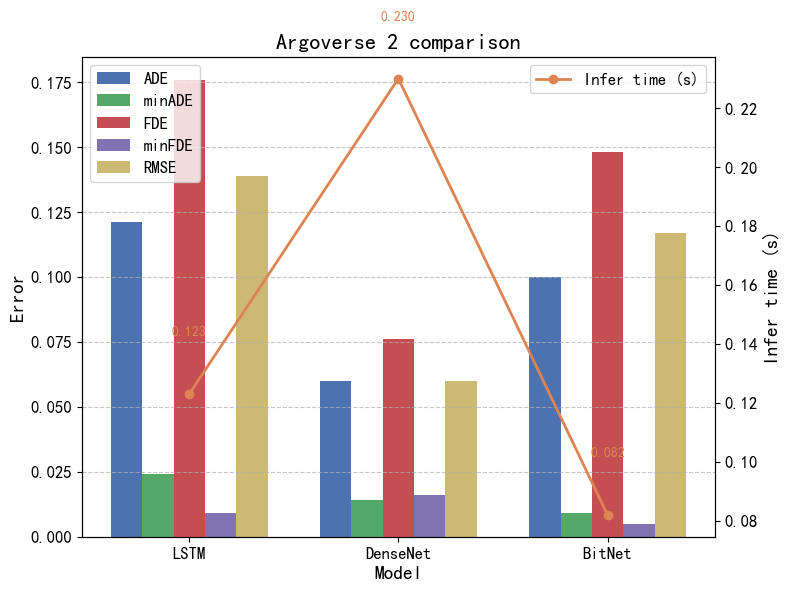

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ['LSTM', 'DenseNet', 'BitNet']
ade = [0.121,  0.06, 0.10]
min_ade = [0.024, 0.014, 0.009]
fde = [0.176, 0.076, 0.148]
min_fde = [0.009,  0.016, 0.005]
rmse = [0.139,  0.06, 0.117]
infer_time = [0.123,  0.23, 0.082]

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建子图
fig, ax1 = plt.subplots(figsize=(8, 6))

# 定义x轴位置
x = np.arange(len(models))  # 模型数量

# 绘制柱状图
bar_width = 0.15
ax1.bar(x - 2 * bar_width, ade, width=bar_width, label='ADE', color='#4C72B0')
ax1.bar(x - bar_width, min_ade, width=bar_width, label='minADE', color='#55A868')
ax1.bar(x, fde, width=bar_width, label='FDE', color='#C44E52')
ax1.bar(x + bar_width, min_fde, width=bar_width, label='minFDE', color='#8172B2')
ax1.bar(x + 2 * bar_width, rmse, width=bar_width, label='RMSE', color='#CCB974')

# 添加标题和标签
ax1.set_title('Argoverse 2 comparison', fontsize=16, fontweight='bold')
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)

# 设置刻度
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=12)
ax1.tick_params(axis='y', labelsize=12)

# 添加图例
ax1.legend(loc='upper left', fontsize=12)

# 添加网格线
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 创建第二个y轴用于绘制推理时间
ax2 = ax1.twinx()
ax2.plot(x, infer_time, label='Infer time (s)', marker='o', color='#DD8452', linewidth=2)
ax2.set_ylabel('Infer time (s)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

# 添加推理时间的数值标签
for i, value in enumerate(infer_time):
    ax2.text(i, value + 0.02, f'{value:.3f}', ha='center', fontsize=10, color='#DD8452')

# 添加图例
ax2.legend(loc='upper right', fontsize=12)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

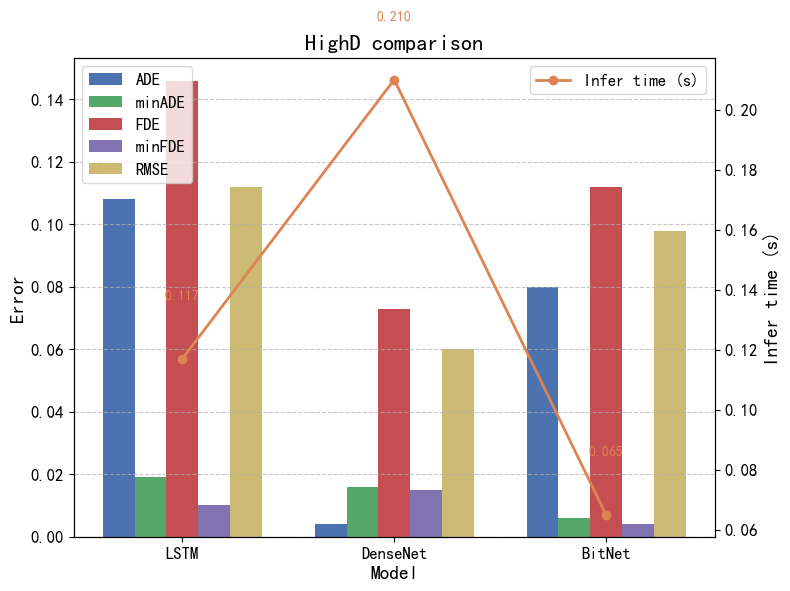

In [6]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LSTM', 'DenseNet', 'BitNet']
ade = [0.108,  0.004, 0.08]
min_ade = [0.019,  0.016, 0.006]
fde = [0.146, 0.073, 0.112]
min_fde = [0.01, 0.015, 0.004]
rmse = [0.112, 0.06, 0.098]
infer_time = [0.117,  0.21, 0.065]


# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建子图
fig, ax1 = plt.subplots(figsize=(8, 6))

# 定义x轴位置
x = np.arange(len(models))  # 模型数量

# 绘制柱状图
bar_width = 0.15
ax1.bar(x - 2 * bar_width, ade, width=bar_width, label='ADE', color='#4C72B0')
ax1.bar(x - bar_width, min_ade, width=bar_width, label='minADE', color='#55A868')
ax1.bar(x, fde, width=bar_width, label='FDE', color='#C44E52')
ax1.bar(x + bar_width, min_fde, width=bar_width, label='minFDE', color='#8172B2')
ax1.bar(x + 2 * bar_width, rmse, width=bar_width, label='RMSE', color='#CCB974')

# 添加标题和标签
ax1.set_title('HighD comparison', fontsize=16, fontweight='bold')
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)

# 设置刻度
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=12)
ax1.tick_params(axis='y', labelsize=12)

# 添加图例
ax1.legend(loc='upper left', fontsize=12)

# 添加网格线
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 创建第二个y轴用于绘制推理时间
ax2 = ax1.twinx()
ax2.plot(x, infer_time, label='Infer time (s)', marker='o', color='#DD8452', linewidth=2)
ax2.set_ylabel('Infer time (s)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

# 添加推理时间的数值标签
for i, value in enumerate(infer_time):
    ax2.text(i, value + 0.02, f'{value:.3f}', ha='center', fontsize=10, color='#DD8452')

# 添加图例
ax2.legend(loc='upper right', fontsize=12)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [7]:
def result2csv(y_pred,y_true,varible_filename,idx):
    df1 = pd.DataFrame(y_pred,columns=[f'预测步长{i+1}' for i in range(PREL)])
    df2 = pd.DataFrame(y_true,columns=[f'真实步长{i+1}' for i in range(PREL)])
    df = pd.concat([df1,df2],axis=1)
    save_path = './results/Densenet/' + str(idx)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    df.to_csv(save_path+f'/预测与真实结果_{varible_filename}.csv',index=False)
    return df1
for j,k in enumerate(pred_results.keys()):
    for hn in hangye:
        idx = hangye.index(hn)
        data = pred_results[k]
        y_pred = data['yhat']
        y_true = data['ytrue']
        df1 = result2csv(y_pred[:,:,idx],y_true[:,:,idx],hangye[idx],j)

In [8]:
k

59

In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import pandas as pd


# 计算每个时间点的指标
def calc_R2_MAE_MSE(y_pred,y_true,feature_name,idx):
    mae_scores = np.mean(np.abs(y_true - y_pred), axis=0)
    mse_scores = np.mean((y_true - y_pred) ** 2, axis=0)
    r2_scores = r2_score(y_true, y_pred, multioutput='raw_values')
    rmse = np.sqrt(mse_scores)
    mape_list = []
    for i in range(y_true.shape[1]):
        mape_list.append(mean_absolute_percentage_error(y_true[:, i], y_pred[:, i])/10)
    mape = np.array(mape_list)
    psnr_list = []
    for i in range(y_true.shape[1]):
        psnr_list.append(psnr(y_true[:, i], y_pred[:, i], data_range=y_true[:, i].max() - y_true[:, i].min()))
    psnr_list = np.array(psnr_list)
    ssim_list = []
    for i in range(y_true.shape[1]):
        ssim_list.append(ssim(y_true[:, i], y_pred[:, i], data_range=y_true[:, i].max() - y_true[:, i].min()))
    ssim_list = np.array(ssim_list)

    # 创建一个包含所有时刻点索引的数组
    time_points = np.arange(1, y_true.shape[1] + 1)

    # 将结果整理成字典
    results_dict = {
        'Time_Point': time_points,
        'MAE': mae_scores,
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse,
        'MAPE': mape,
        'PSNR': psnr_list,
        'SSIM': ssim_list
    }

    # 将字典转换为pandas DataFrame
    results_df = pd.DataFrame(results_dict)
    save_path = './results/Densenet/' + str(idx)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    # 设置Time_Point作为索引（可选）
    results_df.set_index('Time_Point', inplace=True)
    results_df.to_csv(save_path+f'/{feature_name}_R2_MAE_MSE.csv')
for j,k in enumerate(pred_results.keys()):
    for hn in hangye:
        idx = hangye.index(hn)
        data = pred_results[k]
        y_pred = data['yhat']
        y_true = data['ytrue']
        df1 = calc_R2_MAE_MSE(y_pred[:,:,idx],y_true[:,:,idx],hangye[idx],j)

In [10]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os


def plot_scatter_with_metrics(y_pred,y_true,feature_name,idx):
    # 创建目录用于保存图像
    plots_dir = f'prediction_scatter_plots/Densenet/{idx}/{feature_name}'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)


    # 循环遍历每个时刻
    for time_point in range(y_true.shape[1]):
        # 获取当前时刻的真实值和预测值
        true_values = y_true[:, time_point]
        pred_values = y_pred[:, time_point]

        # 计算当前时刻的评价指标
        mae = mean_absolute_error(true_values, pred_values)
        mse = mean_squared_error(true_values, pred_values)
        r2 = r2_score(true_values, pred_values)
        # 创建一个新的图形
        plt.figure(figsize=(10, 6))

        # 绘制散点图
        plt.scatter(true_values, pred_values, alpha=0.6, color='blue')
        
        # 添加对角线表示完美预测
        lims = [np.min([true_values, pred_values]), np.max([true_values, pred_values])]
        plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        plt.xlim(lims)
        plt.ylim(lims)

        # 添加标题和坐标轴标签
        plt.title(f'预测步长为 {time_point + 1}时{feature_name}的真实值和预测值的误差散点图', fontsize=16)
        plt.xlabel('Ground Truth', fontsize=14)
        plt.ylabel('Prediction', fontsize=14)

        # 显示评价指标
        plt.text(0.05, 0.95, f'MAE: {mae:.4f}\nMSE: {mse:.4f}\nR2: {r2:.4f}', 
                horizontalalignment='left',
                verticalalignment='top',
                transform=plt.gca().transAxes,
                bbox=dict(facecolor='white', alpha=0.8),
                fontsize=12)

        # 添加图例
        plt.legend()

        # 保存图表到文件
        plt.savefig(os.path.join(plots_dir, f'timepoint_{time_point + 1}_scatter.png'), bbox_inches='tight', dpi=300)

        # 关闭当前图形以节省内存
        plt.close()

    print("All scatter plots have been saved.")
for j,k in enumerate(pred_results.keys()):
    for hn in hangye:
        idx = hangye.index(hn)
        data = pred_results[k]
        y_pred = data['yhat']
        y_true = data['ytrue']
        df1 = plot_scatter_with_metrics(y_pred[:,:,idx],y_true[:,:,idx],hangye[idx],j)

All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots have been saved.
All scatter plots ha

In [11]:
# 创建目录用于保存图像
def save_plots(y_pred,y_true,feature_name,idx):
    plots_dir = f'./prediction_plots/Densenet/{idx}/{feature_name}'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)


    # 循环遍历每个时刻
    for time_point in range(y_true.shape[1]):
        # 获取当前时刻的真实值和预测值
        true_values = y_true[:, time_point]
        pred_values = y_pred[:, time_point]

        # 计算当前时刻的评价指标
        mae = mean_absolute_error(true_values, pred_values)
        mse = mean_squared_error(true_values, pred_values)
        r2 = r2_score(true_values, pred_values)
        # 创建一个新的图形
        plt.figure(figsize=(10, 5))

        # 绘制散点图
        plt.plot(true_values, alpha=0.6, color='blue', label='Ground Truth',marker='o',markersize=3)
        plt.plot(pred_values, alpha=0.6, color='red', label='Prediction',marker='.',markersize=3)
        # 添加标题和坐标轴标签
        plt.title(f'The prediction result when horion is {time_point + 1}', fontsize=12)
        plt.xlabel('Samples', fontsize=12)
        plt.ylabel(f'{feature_name}', fontsize=12)
        # 显示评价指标
        plt.text(0.05, 0.2, f'MAE: {mae:.4f}\nMSE: {mse:.4f}\nR2: {r2:.4f}\n', 
                horizontalalignment='left',
                verticalalignment='top',
                transform=plt.gca().transAxes,
                bbox=dict(facecolor='white', alpha=0.8),
                fontsize=12)
        # 添加图例
        plt.legend()

        # 保存图表到文件
        plt.savefig(os.path.join(plots_dir, f'timepoint_{time_point + 1}.png'), bbox_inches='tight', dpi=300)

        # 关闭当前图形以节省内存
        plt.close()

    print("All  plots have been saved.")

for j,k in enumerate(pred_results.keys()):
    for hn in hangye:
        idx = hangye.index(hn)
        data = pred_results[k]
        y_pred = data['yhat']
        y_true = data['ytrue']
        df1 = save_plots(y_pred[:,:,idx],y_true[:,:,idx],hangye[idx],j)

All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been saved.
All  plots have been

In [12]:
# 创建目录用于保存图像
def save_multi_steps_plots(y_pred,y_true,feature_name,idx):
    plots_dir = f'./multi_steps/Densenet/{idx}/{feature_name}'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)


    def plot_time(y_true,y_pred,select_sample = 0):
        # 创建一个新的图形
        plt.figure(figsize=(10, 5))

        # 绘制真实值和预测值的折线图
        plt.plot(y_true, label='Ground Truth', marker='o', linestyle='-', color='blue')
        plt.plot(y_pred, label='Prediction', marker='x', linestyle='--', color='red')
        plt.xticks(range(len(y_true)),[f'Horizon {i+1}' for i in range(len(y_true))], fontsize=12)

        # 添加标题和坐标轴标签
        plt.title(f'Multi-step forecast results', fontsize=12)
        plt.xlabel('Horizon', fontsize=12)
        plt.ylabel(f'{feature_name}', fontsize=12)
        plt.legend()
        # 添加网格线
        plt.grid(True)
        plt.savefig(f'{plots_dir}/{select_sample}.png')
        plt.close()
    for select_sample in range(0,len(y_true),10):
        if select_sample > 100: break
        plot_time(y_true=y_true[select_sample],y_pred=y_pred[select_sample],select_sample=select_sample)


for j,k in enumerate(pred_results.keys()):
    for hn in hangye:
        idx = hangye.index(hn)
        data = pred_results[k]
        y_pred = data['yhat']
        y_true = data['ytrue']
        df1 = save_multi_steps_plots(y_pred[:,:,idx],y_true[:,:,idx],hangye[idx],j)